In [1]:
import jax
import jax.numpy as jnp
from icosphere import icosphere
from discrete_exterior_calculus import DEC

jax.config.update("jax_enable_x64", True)

from persistent_storage import (
    get_value,
    set_value,
    remove_value,
    wipe_db,
    experiment_setup,
    build_experiment_name,
)
from matplotlib import pyplot as plt


def hex_to_rgb(hex: str):
    return jnp.clip(
        jnp.array([int(hex[i : i + 2], 16) for i in (0, 2, 4)]) * 2 / 255, 0, 1
    ).tolist()


import itertools
import probabilistic_solve_icosphere
from diffrax import diffeqsolve, ODETerm, SaveAt, PIDController, Kvaerno5

problem_names = [
    "wave and tiny tan",
    "heat and square",
    "wave and medium tan",
    "wave and big tan",
    "wave",
]

for problem_name in problem_names:
    print("Running experiments for problem:", problem_name)
    data = experiment_setup[problem_name]
    priors, prior_scales, derivatives, timesteps, problem_title, vf, order, domain = (
        data["priors"],
        data["prior_scale"],
        data["derivatives"],
        data["timesteps"],
        data["problem_title"],
        data["vector_field"],
        data["order"],
        data["domain"],
    )

Running experiments for problem: wave and tiny tan
Running experiments for problem: heat and square
Running experiments for problem: wave and medium tan
Running experiments for problem: wave and big tan
Running experiments for problem: wave


### precision / work plot

wave
experiment_name wave_2_10 problem_name wave
experiment_name wave_2_18 problem_name wave
Skipping wave_2_18
experiment_name wave_2_35 problem_name wave
Skipping wave_2_35
experiment_name wave_2_68 problem_name wave
experiment_name wave_2_129 problem_name wave
Skipping wave_2_129
experiment_name wave_2_244 problem_name wave
Skipping wave_2_244
experiment_name wave_2_464 problem_name wave
Skipping wave_2_464
experiment_name wave_2_879 problem_name wave
Skipping wave_2_879
experiment_name wave_2_1668 problem_name wave
Skipping wave_2_1668
experiment_name wave_2_3162 problem_name wave
experiment_name wave_3_10 problem_name wave
experiment_name wave_3_18 problem_name wave
Skipping wave_3_18
experiment_name wave_3_35 problem_name wave
Skipping wave_3_35
experiment_name wave_3_68 problem_name wave
experiment_name wave_3_129 problem_name wave
Skipping wave_3_129
experiment_name wave_3_244 problem_name wave
Skipping wave_3_244
experiment_name wave_3_464 problem_name wave
Skipping wave_3_464

''

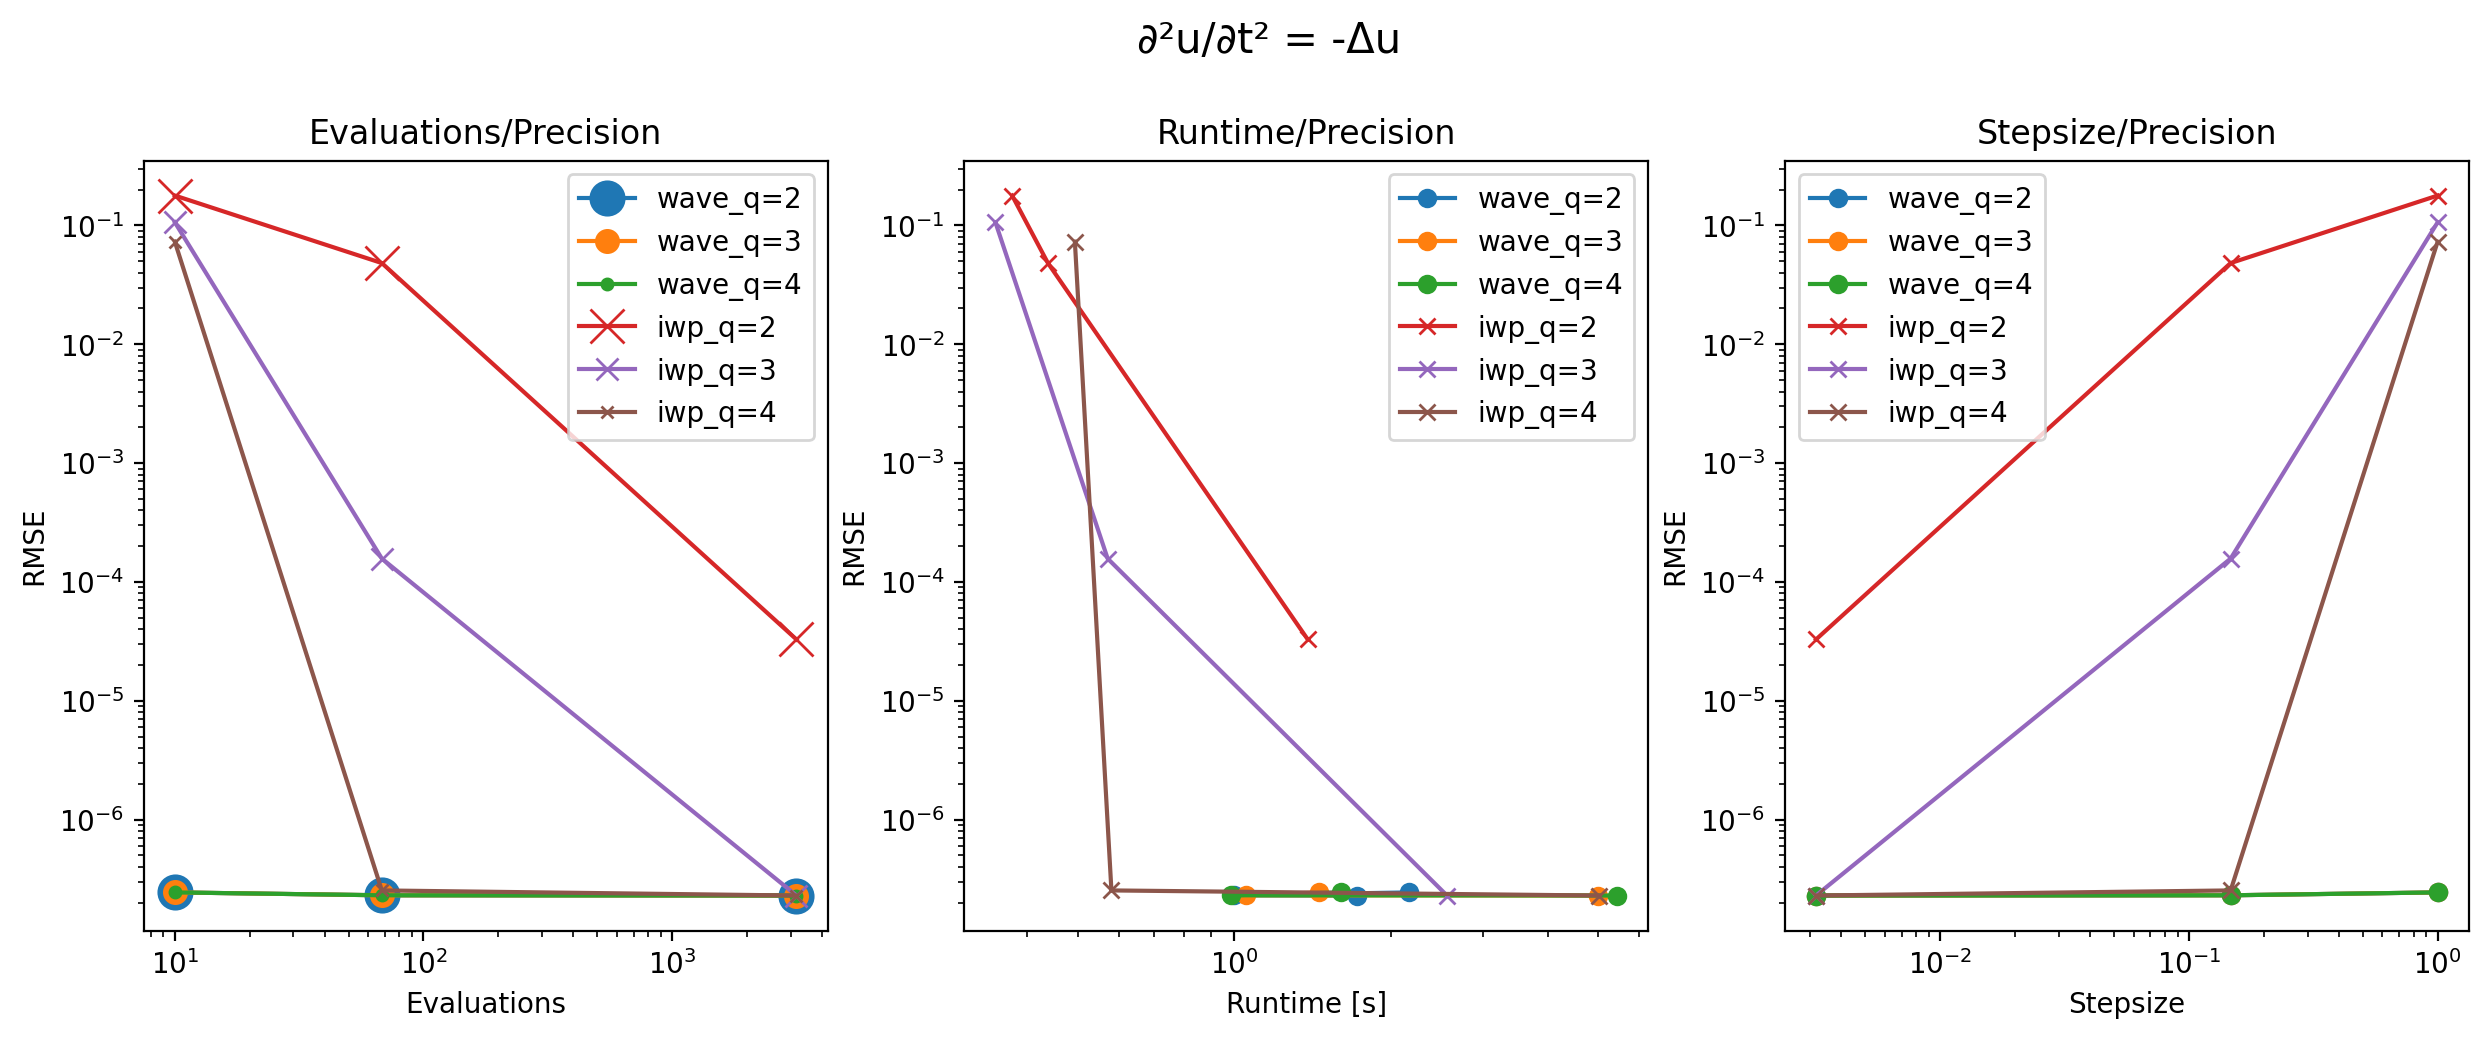

In [8]:
fig, (ax, runtime_ax, stepsize_ax) = plt.subplots(1, 3, dpi=200, figsize=(15, 5))

fig.text(
    0.5,
    1,
    problem_title,
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=15,
)

ax.set_title("Evaluations/Precision")
runtime_ax.set_title("Runtime/Precision")
stepsize_ax.set_title("Stepsize/Precision")

ax.set_ylabel("RMSE")
ax.set_xlabel("Evaluations")

stepsize_ax.set_ylabel("RMSE")
stepsize_ax.set_xlabel("Stepsize")

runtime_ax.set_ylabel("RMSE")
runtime_ax.set_xlabel("Runtime [s]")


print(problem_name)
for prior, marker in zip(priors, ["o", "x"]):
    for q in derivatives:
        name = f"{prior}_q={q}"
        time_rmse = []
        runtime_rmse = []
        for timestep in timesteps:
            experiment_name = build_experiment_name(prior, q, timestep)
            print("experiment_name", experiment_name, "problem_name", problem_name)
            means, stds, runtime, rmse = get_value(
                experiment_name, [None] * 4, problem_name
            )
            if means is None or jnp.isnan(means).any():
                print("Skipping", experiment_name)
                continue
            time_rmse.append((timestep, rmse))
            runtime_rmse.append((runtime, rmse))

        ax.plot(
            *zip(*time_rmse), label=name, marker=marker, markersize=(2 * (10 - 2 * q))
        )
        runtime_ax.plot(*zip(*runtime_rmse), label=name, marker=marker)
        stepsize_ax.plot(
            [10 / time for time, _ in time_rmse],
            [rmse for _, rmse in time_rmse],
            label=name,
            marker=marker,
        )

ax.legend()
ax.loglog()
runtime_ax.legend()
runtime_ax.loglog()
stepsize_ax.legend()
stepsize_ax.loglog()
;

# Evaluations / Precision plot

wave_2_10
wave_2_18
wave_2_35
wave_2_68
wave_2_129
wave_2_244
wave_2_464
wave_2_879
wave_2_1668
wave_2_3162
wave_3_10
wave_3_18
wave_3_35
wave_3_68
wave_3_129
wave_3_244
wave_3_464
wave_3_879
wave_3_1668
wave_3_3162
wave_4_10
wave_4_18
wave_4_35
wave_4_68
wave_4_129
wave_4_244
wave_4_464
wave_4_879
wave_4_1668
wave_4_3162
iwp_2_10
iwp_2_18
iwp_2_35
iwp_2_68
iwp_2_129
iwp_2_244
iwp_2_464
iwp_2_879
iwp_2_1668
iwp_2_3162
iwp_3_10
iwp_3_18
iwp_3_35
iwp_3_68
iwp_3_129
iwp_3_244
iwp_3_464
iwp_3_879
iwp_3_1668
iwp_3_3162
iwp_4_10
iwp_4_18
iwp_4_35
iwp_4_68
iwp_4_129
iwp_4_244
iwp_4_464
iwp_4_879
iwp_4_1668
iwp_4_3162


[]

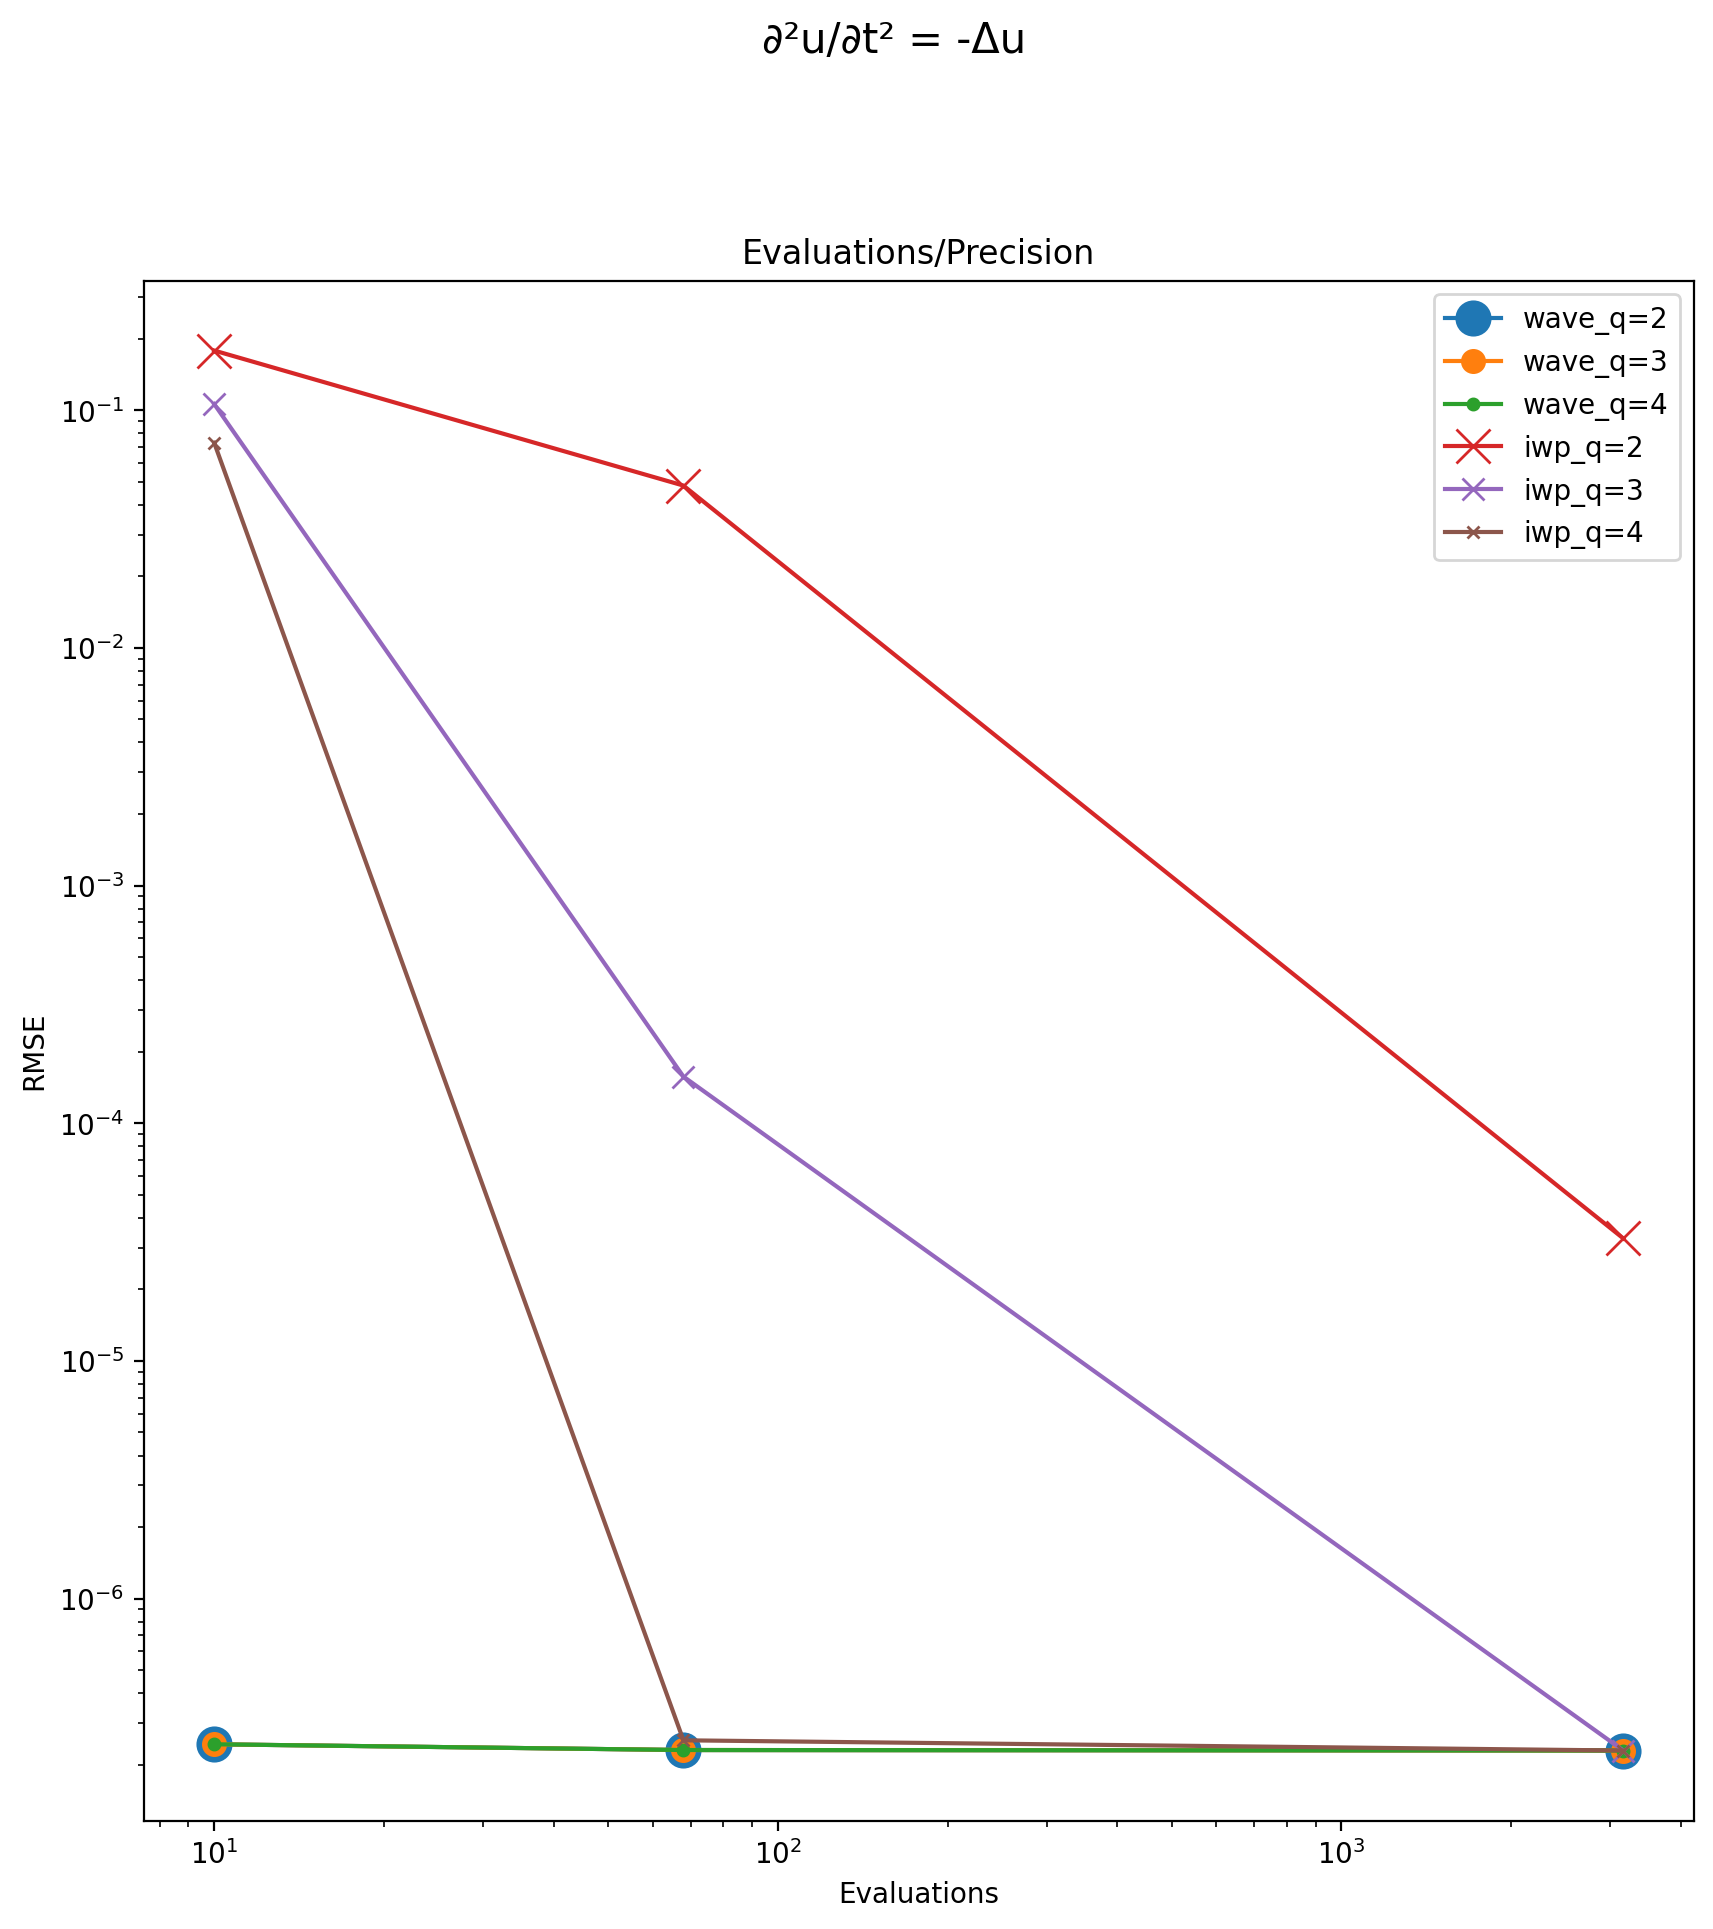

In [3]:
fig, (ax) = plt.subplots(1, 1, dpi=200, figsize=(10, 10))

fig.text(
    0.5,
    1,
    problem_title,
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=15,
)

ax.set_title("Evaluations/Precision")

ax.set_ylabel("RMSE")
ax.set_xlabel("Evaluations")


for prior, marker in zip(priors, ["o", "x"]):
    for q in derivatives:
        name = f"{prior}_q={q}"
        time_rmse = []
        runtime_rmse = []
        for timestep in timesteps:
            experiment_name = build_experiment_name(prior, q, timestep)
            print(experiment_name)
            means, stds, runtime, rmse = get_value(
                f"{prior}_{q}_{timestep}", [None] * 4, problem_name
            )
            if means is None or jnp.isnan(means).any():
                continue
            time_rmse.append((timestep, rmse))
            runtime_rmse.append((runtime, rmse))

        ax.plot(
            *zip(*time_rmse), label=name, marker=marker, markersize=(2 * (10 - 2 * q))
        )

ax.legend()
ax.loglog()


### Calibration plot

NameError: name 'diffrax_sol' is not defined

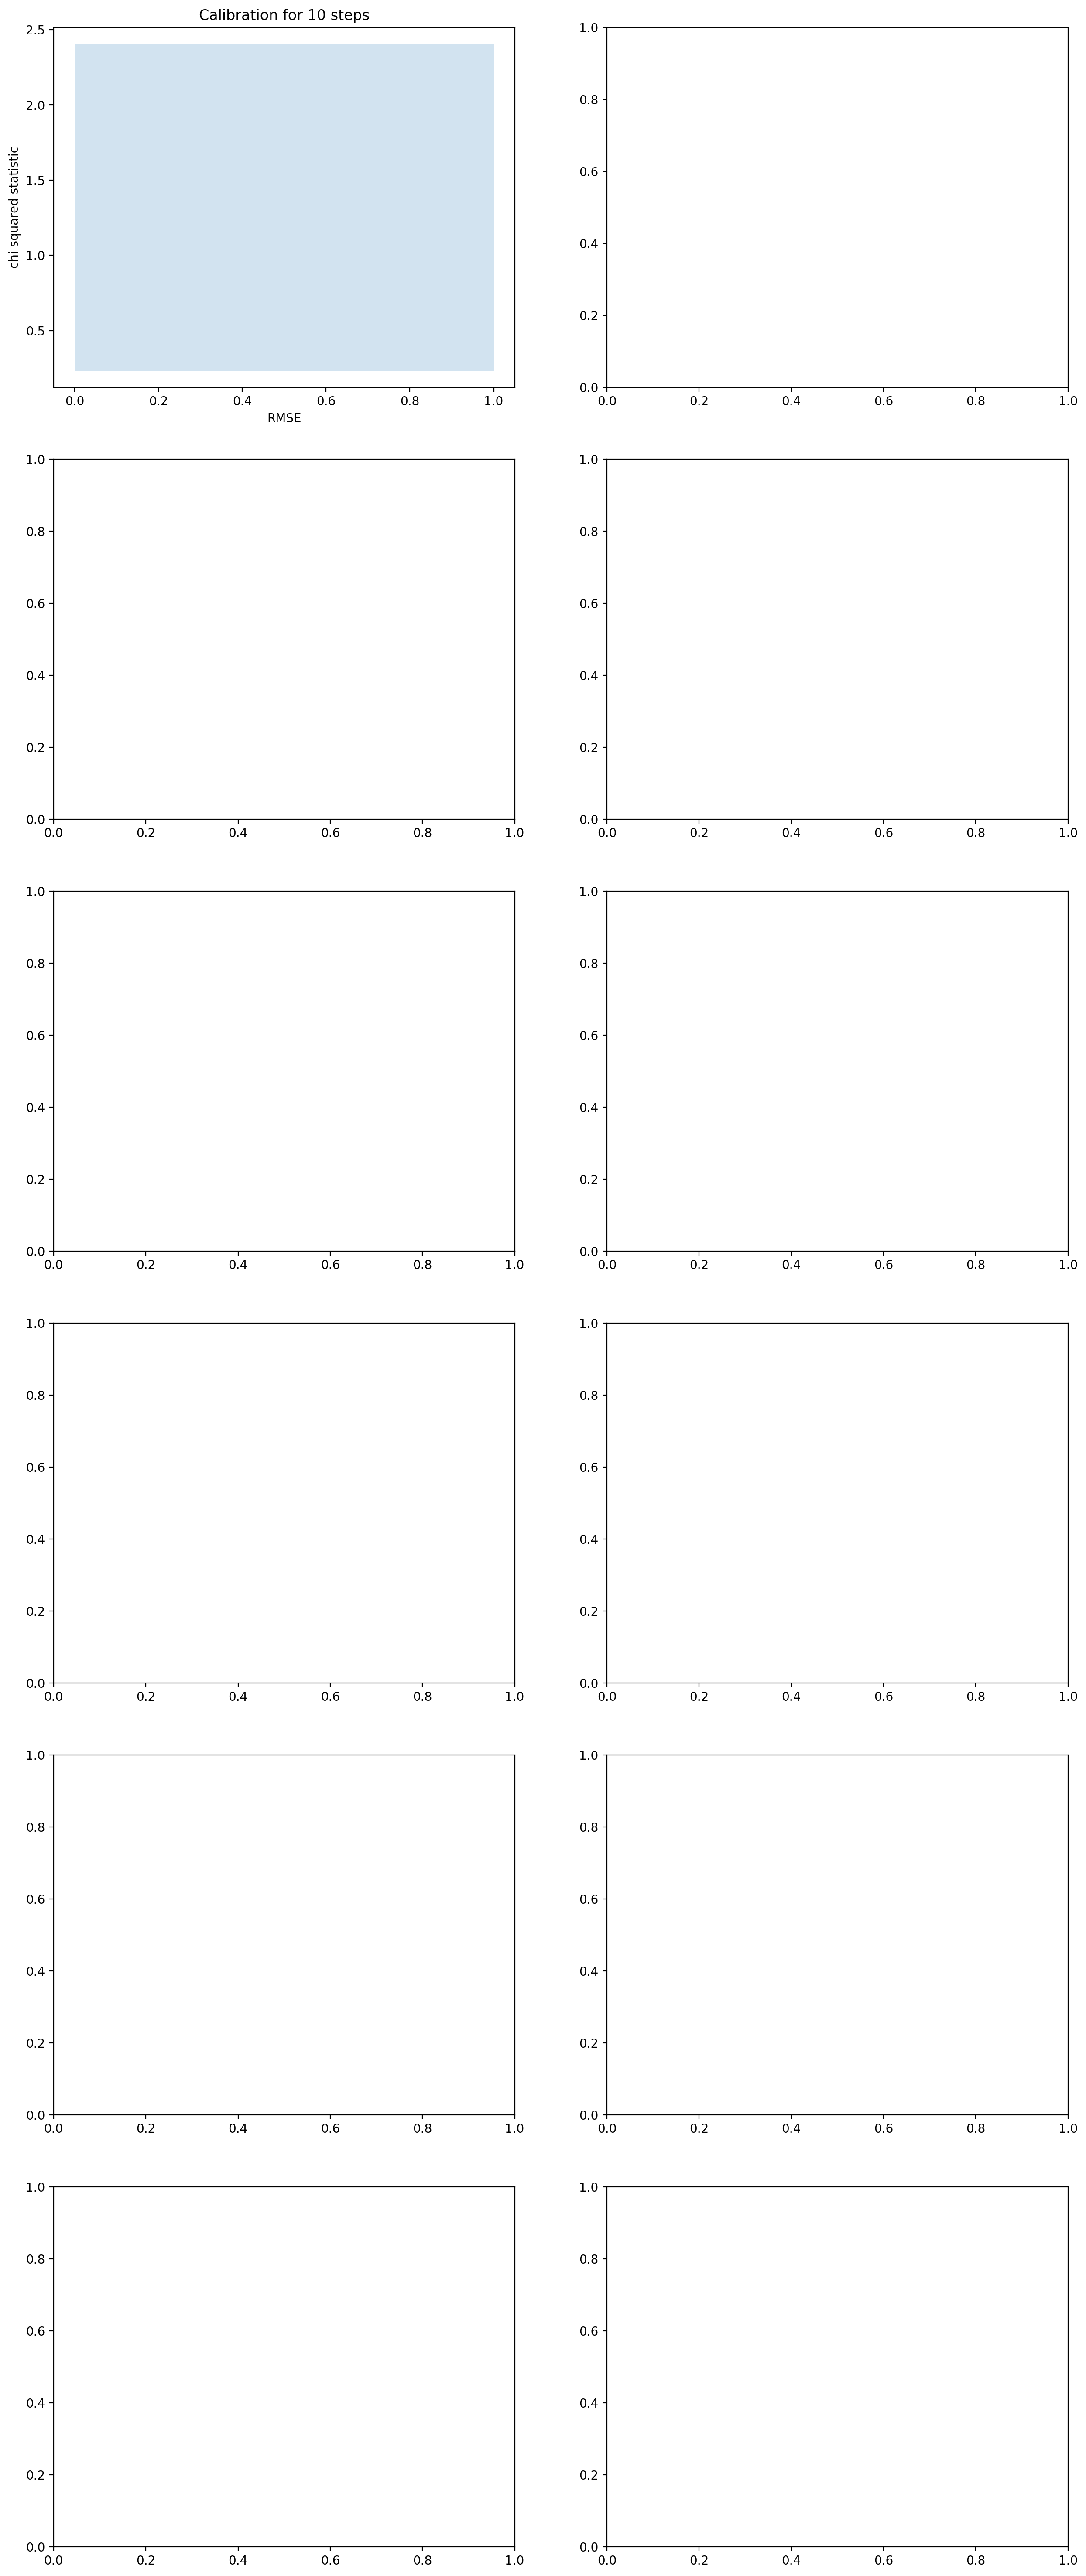

In [4]:
# evalute chi squared statistic
import scipy.stats as stats

# precision / work plot
fig, (ax) = plt.subplots(
    len(timesteps) // 2 + 1, 2, dpi=200, figsize=(15, (len(timesteps) // 2) * 7.5)
)


for eval_axis, timestep in zip(ax.flatten(), timesteps):
    eval_axis.set_title(f"Calibration for {timestep} steps")
    eval_axis.set_ylabel("chi squared statistic")
    eval_axis.set_xlabel("RMSE")
    end = stats.chi2.ppf(0.99, df=timestep - 1) / (timestep - 1)
    start = stats.chi2.ppf(0.01, df=timestep - 1) / (timestep - 1)

    eval_axis.fill_between(
        [0, 1], [start, start], [end, end], alpha=0.2, label="chi squared 99%"
    )

    all_rmses = []
    for prior in priors:
        name = f"{prior}"
        chi_rmse_q = []
        for q in derivatives:
            experiment_name = build_experiment_name(prior, q, timestep)
            means, stds, runtime, rmse = get_value(
                f"{prior}_{q}_{timestep}", [None] * 4, problem_name
            )
            if means is None or jnp.isnan(means).any():
                continue

            diff = means - diffrax_sol
            stat = jnp.mean((diff[1:-1] / stds[1:-1]) ** 2)
            print(
                f"prior: {prior}, q: {q}, timestep: {timestep}, chi: {stat.round(2)}, log RMSE: {jnp.log(rmse).round(2)}"
            )

            start = stats.chi2.ppf(0.01, df=1)
            end = stats.chi2.ppf(0.99, df=1)
            chi_rmse_q.append((stat, rmse, q))
            all_rmses.append(rmse)

        if chi_rmse_q == []:
            continue
        text_fix = [-0.0, -0]
        last_plot_color = eval_axis.plot(
            [rmse for (_, rmse, _) in chi_rmse_q],
            [(chi) for (chi, _, _) in chi_rmse_q],
            label=name,
            marker="o",
            markersize=10,
        )[-1].get_color()
        for chi, rmse, q in chi_rmse_q:
            eval_axis.text(
                rmse + text_fix[0],
                chi + text_fix[1],
                q,
                horizontalalignment="center",
                verticalalignment="center",
                color=hex_to_rgb(last_plot_color[1:]),
            )

    eval_axis.set_xlim(0, jnp.max(jnp.array(all_rmses)) * 1.3)
    eval_axis.legend()
    eval_axis.set_yscale("log")

4110.6


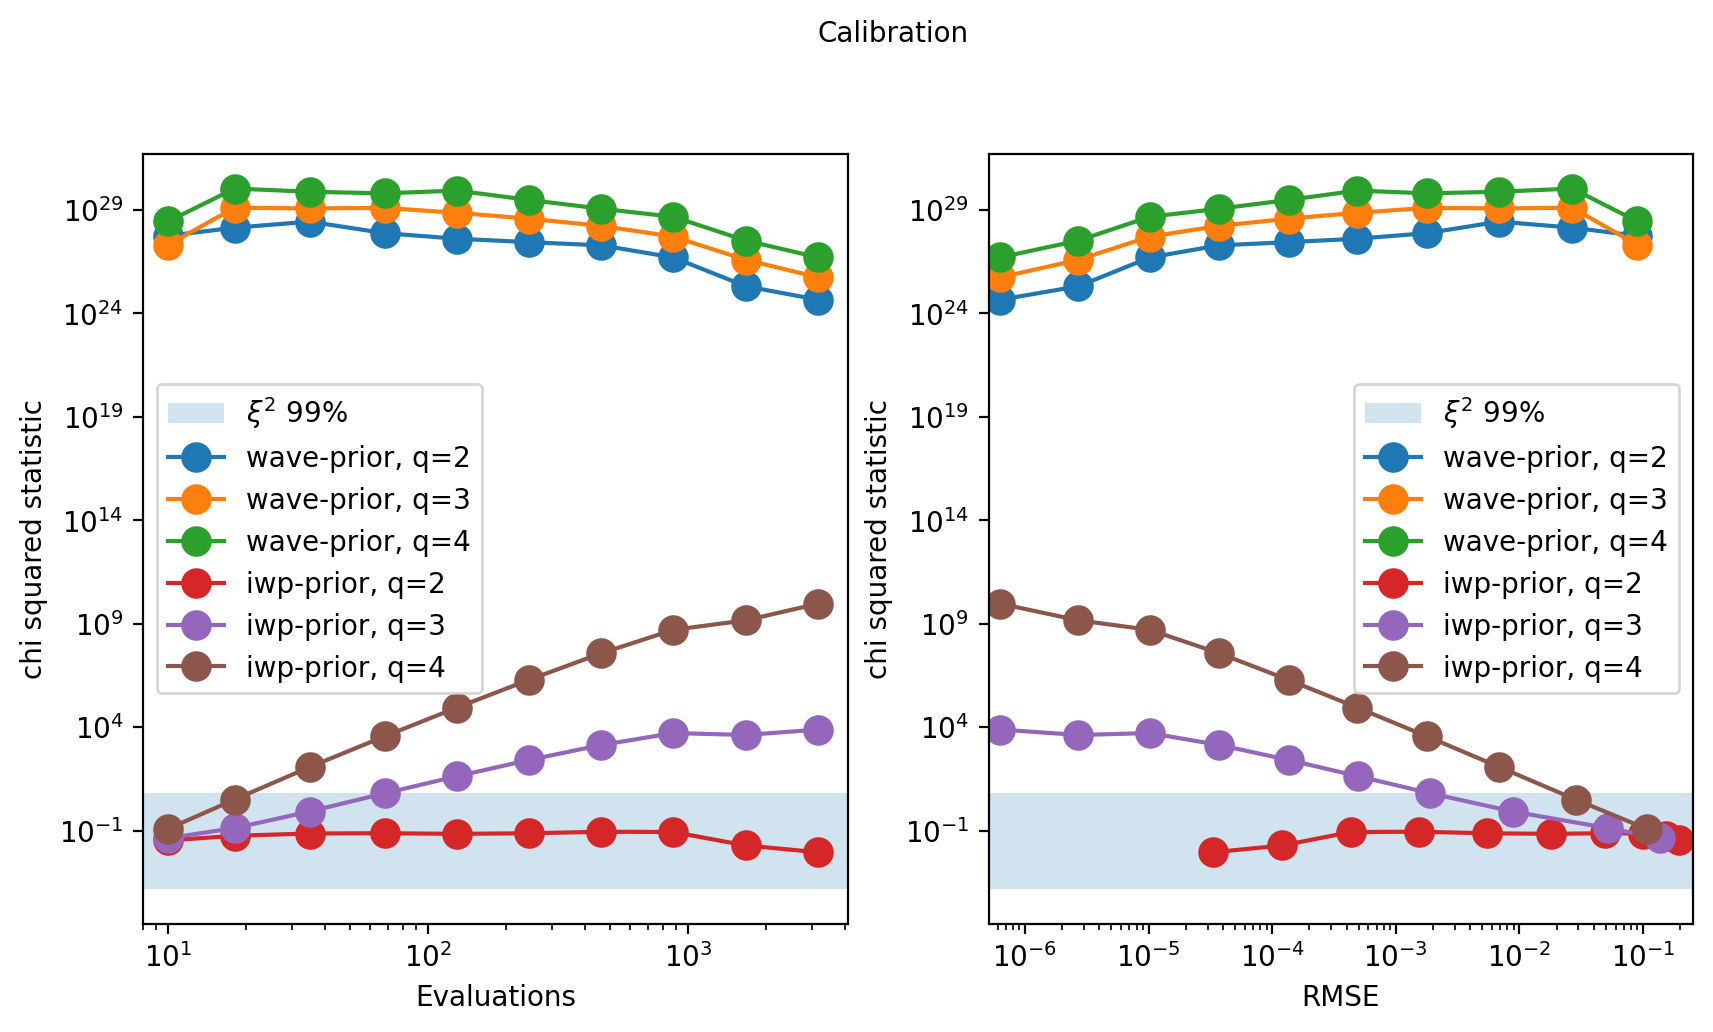

In [ ]:
# evalute chi squared statistic
import scipy.stats as stats

# precision / work plot
fig, (eval_axis, rmse_axis) = plt.subplots(1, 2, dpi=200, figsize=(10, 5))

fig.text(
    0.5, 1, "Calibration", horizontalalignment="center", verticalalignment="center"
)

eval_axis.set_ylabel("chi squared statistic")
rmse_axis.set_ylabel("chi squared statistic")

eval_axis.set_xlabel("Evaluations")
rmse_axis.set_xlabel("RMSE")

start = stats.chi2.ppf(0.01, df=1)
end = stats.chi2.ppf(0.99, df=1)
eval_axis.fill_between(
    [0, 1e5], [start, start], [end, end], alpha=0.2, label=r"$\xi^2$ 99%"
)
rmse_axis.fill_between(
    [0, 1e5], [start, start], [end, end], alpha=0.2, label=r"$\xi^2$ 99%"
)

all_rmses = []
all_timesteps = []
for prior in priors:
    name = f"{prior}"
    for q in derivatives:
        chi_rmse_q_time = []

        for timestep in timesteps:
            experiment_name = build_experiment_name(prior, q, timestep)
            means, stds, runtime, rmse = get_value(
                f"{prior}_{q}_{timestep}", [None] * 4, problem_name
            )
            if means is None or jnp.isnan(means).any():
                continue

            diff = means - diffrax_sol
            stat = jnp.mean((diff[1:-1] / stds[1:-1]) ** 2)

            chi_rmse_q_time.append((stat, rmse, q, timestep))  #  * (timestep)
            all_rmses.append(rmse)
            all_timesteps.append(timestep)

        if chi_rmse_q_time == []:
            continue

        last_plot_color = eval_axis.plot(
            [timestep for (_, rmse, _, timestep) in chi_rmse_q_time],
            [(chi) for (chi, _, _, _) in chi_rmse_q_time],
            label=f"{name}-prior, q={q}",
            marker="o",
            markersize=10,
        )[-1].get_color()

        last_plot_color = rmse_axis.plot(
            [rmse for (_, rmse, _, _) in chi_rmse_q_time],
            [(chi) for (chi, _, _, _) in chi_rmse_q_time],
            label=f"{name}-prior, q={q}",
            marker="o",
            markersize=10,
        )[-1].get_color()

rmse_axis.set_xlim(
    jnp.min(jnp.array(all_rmses)) * 0.8, jnp.max(jnp.array(all_rmses)) * 1.3
)
eval_axis.set_xlim(
    jnp.min(jnp.array(all_timesteps)) * 0.8, jnp.max(jnp.array(all_timesteps)) * 1.3
)
print(jnp.max(jnp.array(all_timesteps)) * 1.3)
eval_axis.legend()
rmse_axis.legend()
eval_axis.set_yscale("log")
rmse_axis.set_yscale("log")
eval_axis.set_xscale("log")
rmse_axis.set_xscale("log")

### Showing the actual solutions at a fixed spatial point

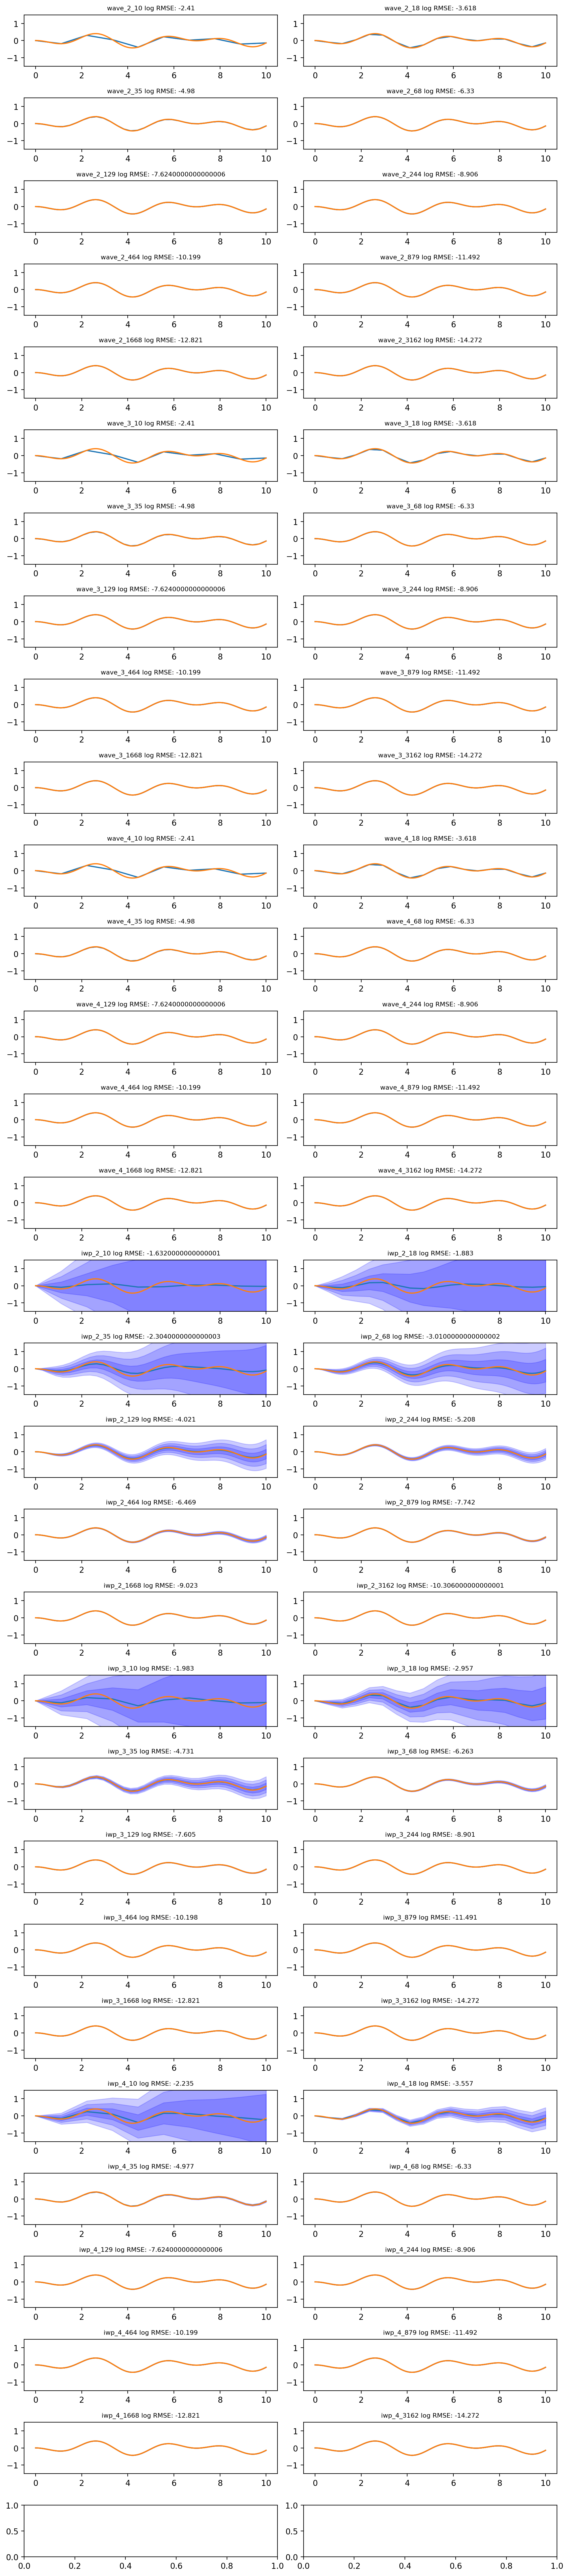

In [ ]:
import probabilistic_solve_icosphere

fig, ax = plt.subplots(
    1 + len(product) // 2, 2, dpi=200, figsize=(10, 1.5 * len(product) // 2)
)
fig.tight_layout(pad=5.0)
for i, (prior, q, timestep) in enumerate(product):
    experiment_name = build_experiment_name(prior, q, timestep)
    means, stds, runtime, rmse = get_value(experiment_name, [None] * 4, problem_name)
    if means is None:
        continue

    ax.flatten()[i].plot(probabilistic_solve_icosphere.return_times, means, label="EKF")

    def plot_3std(ax, x, means, stds, color):
        ax.fill_between(x, means - stds, means + stds, color=color, alpha=0.2)
        ax.fill_between(x, means - 2 * stds, means + 2 * stds, color=color, alpha=0.2)
        ax.fill_between(x, means - 3 * stds, means + 3 * stds, color=color, alpha=0.2)

    plot_3std(
        ax.flatten()[i], probabilistic_solve_icosphere.return_times, means, stds, "blue"
    )

    ax.flatten()[i].plot(
        probabilistic_solve_icosphere.return_times, diffrax_sol, label="diffrax"
    )
    ax.flatten()[i].set_title(
        f"{experiment_name} log RMSE: {jnp.log(rmse).round(3)}", fontsize=8
    )

    ax.flatten()[i].set_ylim(-1.5, 1.5)

fig.tight_layout()

# plot to see error per timestep

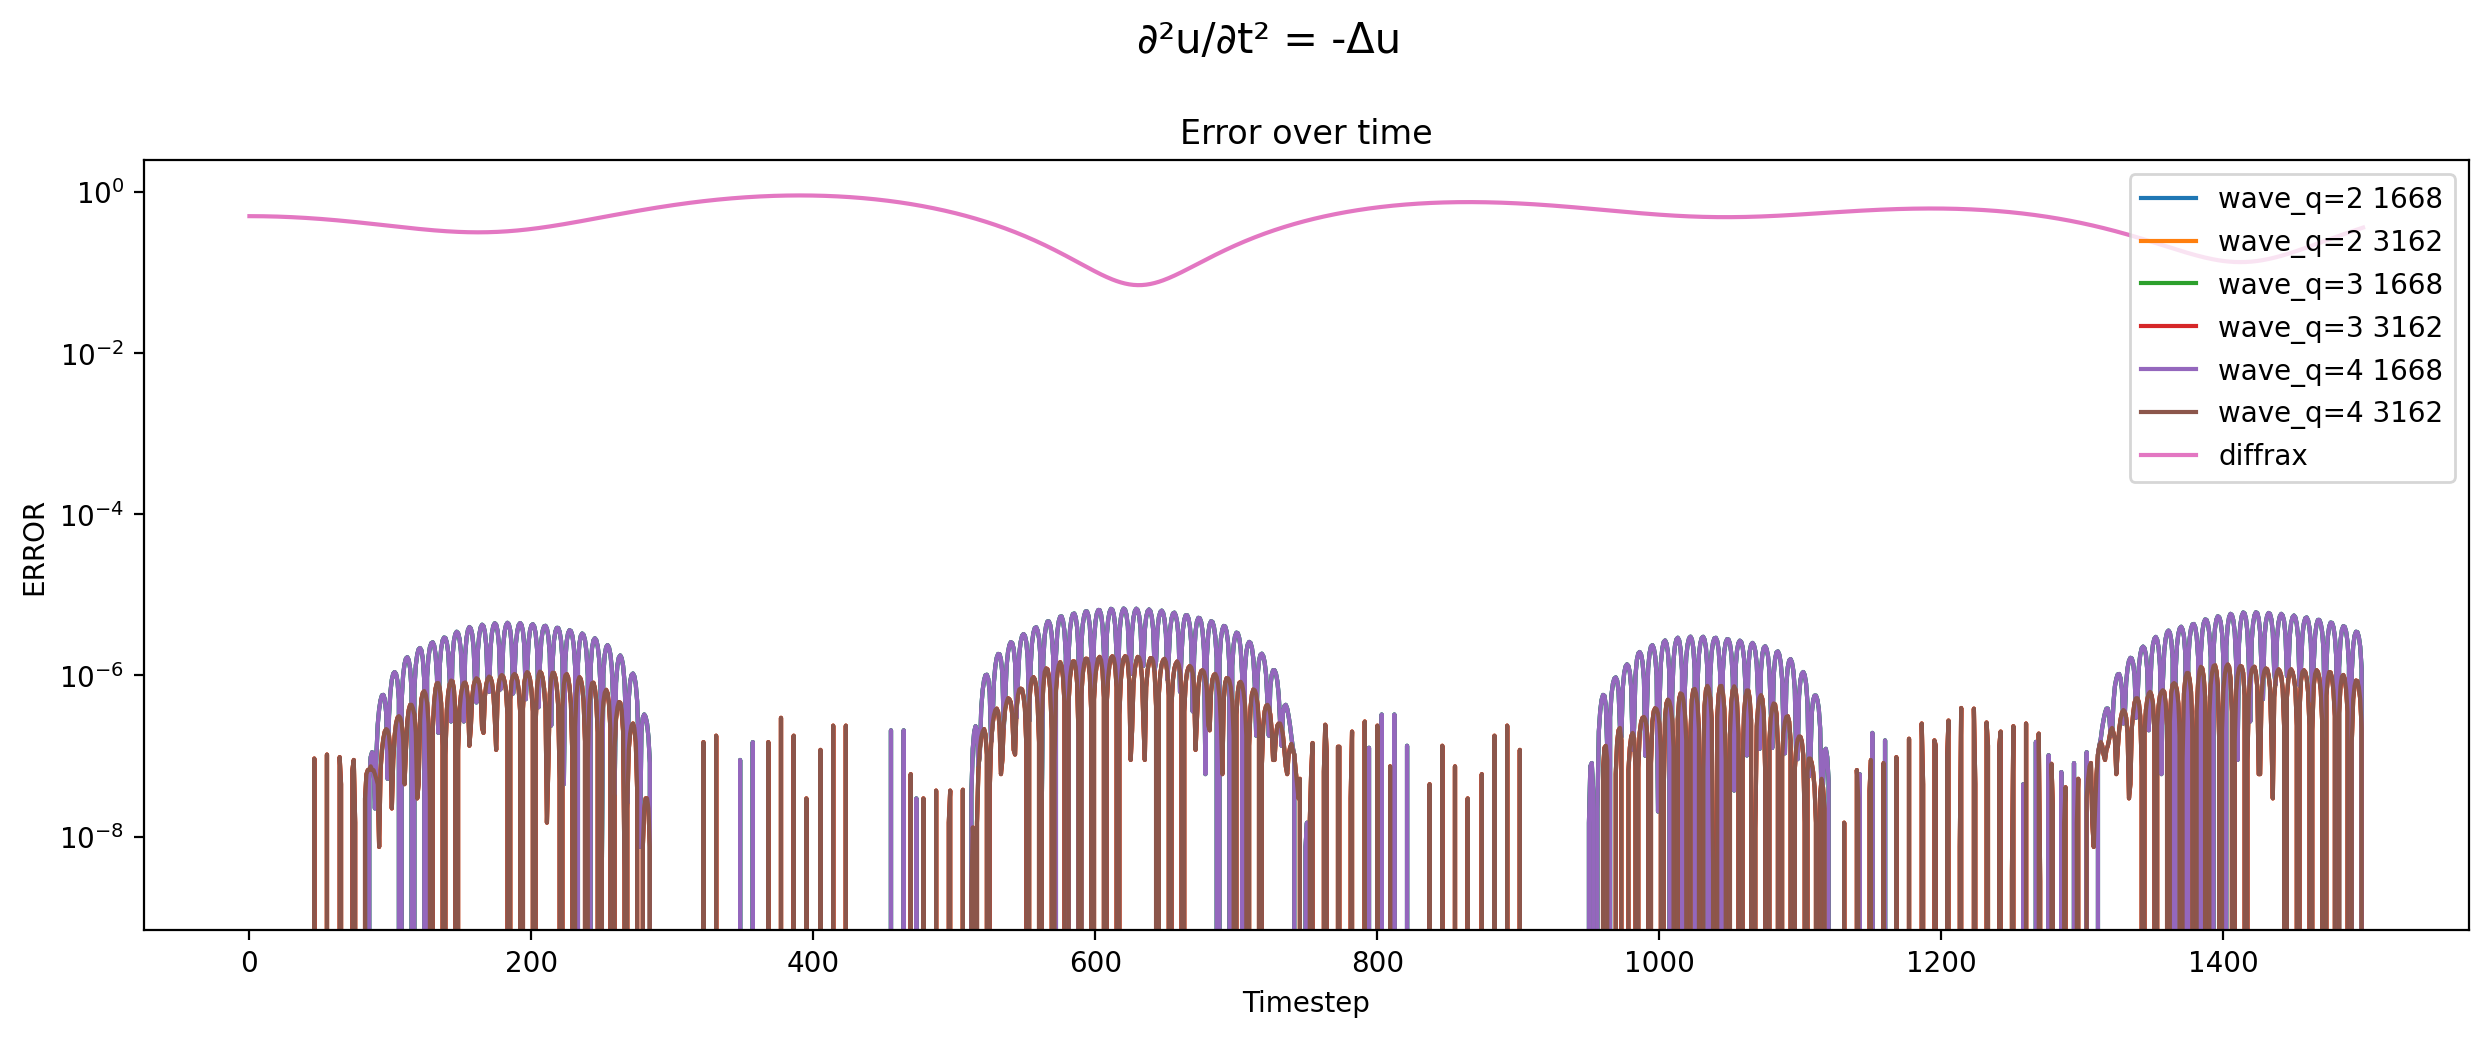

In [ ]:
fig, (ax) = plt.subplots(1, 1, dpi=200, figsize=(15, 5))

fig.text(
    0.5,
    1,
    problem_title,
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=15,
)

ax.set_title("Error over time")

ax.set_ylabel("ERROR")
ax.set_xlabel("Timestep")


for prior, marker in zip(priors, ["o", "x"]):
    if marker == "x":
        continue
    for q in derivatives:
        name = f"{prior}_q={q}"
        time_rmse = []
        runtime_rmse = []
        for timestep in timesteps[-2:]:
            experiment_name = build_experiment_name(prior, q, timestep)
            means, stds, runtime, rmse = get_value(
                f"{prior}_{q}_{timestep}", [None] * 4, problem_name
            )
            if means is None or jnp.isnan(means).any():
                continue

            ax.plot(
                (means - diffrax_sol),
                label=name + f" {timestep}",
                # marker=marker,
                # markersize=(2 * (10 - 2 * q)),
            )

ax.plot(diffrax_sol + 0.5, label="diffrax")
ax.legend()
ax.set_yscale("log")

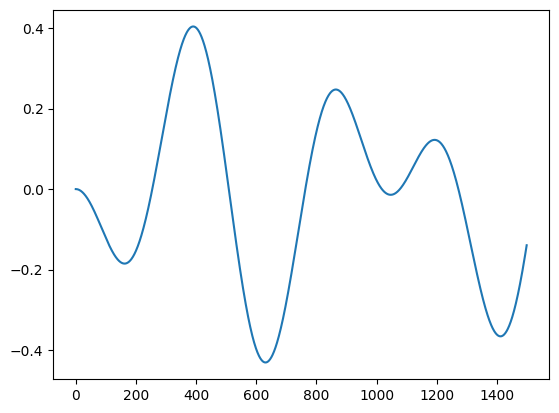

In [ ]:
plt.plot(diffrax_sol)